# Классификация текста

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

Мы будем решать задачу предсказания оценки, проставленной вину, базируясь на отзыве. Данные взяты из конкурса https://www.kaggle.com/zynicide/wine-reviews

In [3]:
data = pd.read_csv('winemag.csv', index_col=0, na_filter=False)
data.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,,Sicily & Sardinia,Etna,,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,,,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,,Alexander Peartree,,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


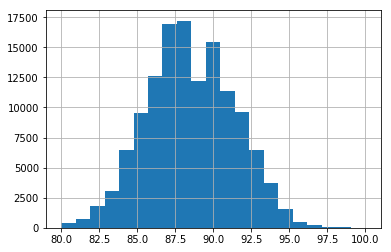

In [4]:
data['points'].hist(bins=21)

Бинаризуем таргет: будем предсказывать, превысит ли оценка 90.

In [5]:
data['>=90'] = data['points'] >= 90

data.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,>=90
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,,Sicily & Sardinia,Etna,,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,False
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,,,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,False
2,US,"Tart and snappy, the flavors of lime flesh and...",,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,False
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,,Alexander Peartree,,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,False
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,False


In [6]:
data[::100]

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,>=90
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,,Sicily & Sardinia,Etna,,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,False
100,US,"Fresh apple, lemon and pear flavors are accent...",,88,18.0,New York,Finger Lakes,Finger Lakes,Anna Lee C. Iijima,,Ventosa 2015 Pinot Gris (Finger Lakes),Pinot Gris,Ventosa,False
200,Italy,"Aromas of mature black-skinned berry, tobacco ...",Riserva,90,,Tuscany,Brunello di Montalcino,,Kerin O’Keefe,@kerinokeefe,Tenuta di Sesta 2011 Riserva (Brunello di Mon...,Sangiovese,Tenuta di Sesta,True
300,US,"Soft, light in body and easy to drink, this Sa...",Estate,87,28.0,California,Napa Valley,Napa,,,Benessere 2007 Estate Sangiovese (Napa Valley),Sangiovese,Benessere,False
400,Italy,Tonic and lean with a nearly transparent color...,Brut,85,13.0,Italy Other,Italy,,,,Cantine Maschio NV Brut Prosecco (Italy),Prosecco,Cantine Maschio,False
500,Spain,Aromas of watermelon and a dusting of natural ...,Rosado,87,11.0,Northern Spain,Rioja,,Michael Schachner,@wineschach,El Coto 2011 Rosado Rosé (Rioja),Rosé,El Coto,False
600,Italy,Crisp and light with pretty mineral dustings b...,Le Marne,87,19.0,Piedmont,Gavi,,,,Michele Chiarlo 2011 Le Marne (Gavi),Cortese,Michele Chiarlo,False
700,Argentina,"Intriguing aromas of lavender, hoja santa and ...",,91,30.0,Mendoza Province,Mendoza,,Michael Schachner,@wineschach,El Enemigo 2012 Bonarda (Mendoza),Bonarda,El Enemigo,True
800,US,"With black cherry, blueberry, milk chocolate a...",,90,20.0,California,Santa Ynez Valley,Central Coast,Matt Kettmann,@mattkettmann,Chessman 2014 Cabernet Sauvignon (Santa Ynez V...,Cabernet Sauvignon,Chessman,True
900,Spain,It has taken a few years but Morlanda has reac...,Criança,90,48.0,Catalonia,Priorat,,Michael Schachner,@wineschach,Morlanda 2007 Criança Red (Priorat),Red Blend,Morlanda,True


Из всего многообразия признаков нас будет интересовать **description** -- признак содержащий описание вина и **points** -- присужденный балл

#### Задание 1
Выделите из данных X и y

In [7]:
X = data['description']
y = data['>=90']

## Извлечение признаков из текстов

Перед тем как работать с текстом, его необходимо токенизировать - разбить на отдельные токены. В качестве токенов могут выступать слова, фразы, предложений и т.п. Токенизировать текст можно  помощью регулярных выражений или готовых токенизаторов. 

После токенизации нужно привести текст к нормальной форме. Речь идет о [стемминге и/или лемматизации](https://nlp.stanford.edu/IR-book/html/htmledition/stemming-and-lemmatization-1.html) - это схожие процессы, используемые для обработки словоформ.

Для работы лемматизации английского текста можно воспользоваться библиотекой nltk:

In [8]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Yury\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Yury\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

#### Задание 2
Токенизируйте тексты. Сейчас Х -- это набор из строк-текстов. Разбейте каждый текст на слова (токенизируйте его), каждое из которых написано в нижнем регистре.

(Вам могут понадобиться функция word_tokenize из nltk.tokenize, а также методы строк isalpha и lower)

In [ ]:
from nltk.tokenize import word_tokenize

tokens = #YOUR CODE

In [ ]:
from nltk.tokenize import word_tokenize

word_tokenize('Hello, it\'s me Vasya1')

#### Задание 3
Теперь, когда для каждого текста у вас есть набор слов, встречающихся в нем, можно переходить к лемматизации.
Лемматизируйте все слова с помощью WordNetLemmatizer и объедините получившиеся слова в одну строку через пробел, запишите результат в X

In [ ]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
#lemmatizer.lemmatize(<word>)

X = #YOUR CODE

In [ ]:
X[0]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [ ]:
y_train = y_train.values
y_test = y_test.values

### Bag of Words

Cоздаем вектор длиной в словарь, для каждого слова считаем количество вхождений в текст и подставляем это число на соответствующую позицию в векторе.

Построим модель BOW с помощью [CountVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorizer.fit(X_train)

vocabulary = vectorizer.get_feature_names()
print('Размер словаря: %d' % len(vocabulary))

description_count = vectorizer.transform(X_train)
top_tokens, _ = zip(*sorted(zip(vocabulary, description_count.sum(axis=0).getA1()), 
                            key=lambda x: x[1], reverse=True)[:10])
print('Top-10 слов: %s'%'; '.join(top_tokens))

Видно, что большая часть из топ-10 слов является не информативными - стоп-словами. Что бы они не участвовали в представлении, в конструктор CountVectorizer в качестве параметра можно передать список стоп-слов:

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')

In [ ]:
'has' in stopwords.words('english')

In [ ]:
stop_words = set(stopwords.words('english'))
vectorizer = CountVectorizer(stop_words=stop_words)
vectorizer.fit(X_train)
vocabulary = vectorizer.get_feature_names()
print('Размер словаря: %d' % len(vocabulary))

description_count = vectorizer.transform(X_train)
top_tokens, _ = zip(*sorted(zip(vocabulary, description_count.sum(axis=0).getA1()), 
                            key=lambda x: x[1], reverse=True)[:10])
print('Top-10 слов: %s'%'; '.join(top_tokens))

In [ ]:
top_tokens, _ = zip(*sorted(zip(vocabulary, description_count.sum(axis=0).getA1()), 
                            key=lambda x: x[1], reverse=True)[:20])
top_tokens

Чтобы сжать векторное представление, можно "отбросить" редкие слова:

In [ ]:
vectorizer = CountVectorizer(stop_words=stop_words, min_df=5).fit(X)
vocabulary = vectorizer.get_feature_names()
print('Размер словаря: %d'%len(vocabulary))

X_train_bow = vectorizer.transform(X_train)
X_test_bow = vectorizer.transform(X_test)

In [ ]:
word_counts = np.array(X_train_bow.sum(axis=0))[0]

### Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
nb_model = MultinomialNB()
#YOUR CODE: train naive bayes model 

y_pred = nb_model.predict_proba(X_test_bow)[:, 1]

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve

In [ ]:
plt.plot(*roc_curve(y_test, y_pred)[:2], label='test roc_auc, BOW model')

plt.plot([0, 1], [0, 1], '--', color='black',)
plt.grid()
plt.legend()

print(roc_auc_score(y_test, y_pred))

In [ ]:
def plot_models(names, models, X_train, X_test, y_train, y_test):
    """
    gets lists of names, models, lists of train and test samples, train and test answers
    plots ROC curves
    """
    
    for name, model, X in zip(names, models, X_train):
        proba = model.predict_proba(X)[:, 1]
        auc = roc_auc_score(y_train, proba)
        plt.plot(*roc_curve(y_train, proba)[:2], label='train %s AUC=%.4f' % (name, auc))
    
    for name, model, X in zip(names, models, X_test):
        proba = model.predict_proba(X)[:, 1]
        auc = roc_auc_score(y_test, proba)
        plt.plot(*roc_curve(y_test, proba)[:2], label='test %s AUC=%.4f' % (name, auc))
        
        
    plt.plot([0, 1], [0, 1], '--', color='black',)
    plt.legend(fontsize='large')
    plt.grid()
    plt.show()

In [ ]:
plot_models(['nb'], [nb_model], [X_train_bow], [X_test_bow], y_train, y_test)

### Логистическая регрессия: сравним качество

In [ ]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression()
#YOUR CODE: train the logistic model

y_pred = #YOUR CODE: predict probabilities

In [ ]:
plot_models(['nb', 'logistic regression'], [nb_model, logistic_model], 
            [X_train_bow] * 2, [X_test_bow] * 2, 
            y_train, y_test)

In [ ]:
threshold = sorted(logistic_model.coef_[0], reverse=True)[100]

In [ ]:
idx = []
for i in range(len(logistic_model.coef_[0])):
    if logistic_model.coef_[0][i] > threshold:
        idx.append(i)
idx = np.array(idx)

In [ ]:
np.array(vocabulary)[idx]